In [15]:
#Math Part
import numpy as np
import pandas as pd
import time

#Graph
import matplotlib.pyplot as plt

import importlib
import circuit
import encoding
import qsvm
import fitness
import gsvm
importlib.reload(circuit)
importlib.reload(encoding)
importlib.reload(qsvm)
importlib.reload(fitness)
importlib.reload(gsvm)

<module 'gsvm' from 'c:\\Users\\londh\\qc\\Automatic_design_of_quantum_feature_maps_Genetic_Auto-Generation-main\\Qkrishi---QSVM\\gsvm.py'>

In [19]:
output="bank_testdata.csv"
df = pd.read_csv('bank_cleaned.csv')

bank_data = df.sample(n = 4000)

y = bank_data['y'].values
X = bank_data[['age','job','marital','education','default','balance','housing','loan','contact',
                'day','month','duration','campaign','pdays','previous','poutcome']].values
start = time.time()

pop, pareto, logbook = gsvm.gsvm(nqubits=6, depth=6, nparameters=6,
                                    X=X, y=y, weights=[-1.0,1.0],
                                    mu=20,lambda_=10, ngen=7)
print(f'Simulation finished after {time.time()-start} seconds')
#print(logbook,type(logbook))


print(f'\nGenetic-algorithm output ({output})')

print('---------------------------------------------')
with open(output, "w") as f:
    for ide, ind in enumerate(pareto):
        genes=''.join(str(i) for i in list(ind))
        gates, acc = ind.fitness.values
        line = f'{ide},"{genes}",{gates},{acc}'
        f.write(line)
        f.write('\n')
        print(line)

ones_ratio0.511
multi


d:\Anaconda\envs\qc\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
d:\Anaconda\envs\qc\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


String: 100101001101101011000100100110001111110010111011011110000011001001000100011101111011100011001001011000111101000011011111110100010000110000111001100100111010000010000100100110101101
 -> accuracy = 0.6175, gates = 38.0,recall = 0.6356968215158925
String: 011001111001001010011111111000011001001001100010010100001101001011101100101110011100001011100001101101100110011001101000010000011100001011000000000001100001010101000100010101001111
 -> accuracy = 0.6025, gates = 23.0,recall = 0.6210268948655256
String: 011000111011010001011110110110100100010110101111011101000111101010110010100001001110111000110101011111011000100011111000000011111001100100011101100001111010000010000101011010101111
 -> accuracy = 0.62625, gates = 27.0,recall = 0.5427872860635696
String: 011111010111010101110110000011100011101101110100111110101001111100111000000100110010110010000111000101101101011100010010010101101001111000010001110001000011111001010010110001011001
 -> accuracy = 0.625, gates = 25.0,recall = 0.63080

In [20]:
iot_result = pd.read_csv('bank_testdata.csv',header=None)

def ordenar_salidas_pareto(dataframe):
    dataframe.columns=['ind','circ','gates','accuracy']
    dataframe.sort_values(['gates','accuracy'], ascending=[False,False],inplace=True)
    dataframe.reset_index(inplace=True)
    dataframe.pop('index')
    return dataframe

iot_salidas = ordenar_salidas_pareto(iot_result)
iot_salidas # Queremos ver el primer circuito del dataframe yya ordenado por accuracy (mejor ind)

,ind,circ,gates,accuracy
0,9,0000111110011100110010111101000010001100011001...,6.471860,0.70250
1,8,1010101111010010100010011011001111010011110110...,6.009271,0.66500
2,7,1010101111010010100010011011001011010011110110...,5.664100,0.64500
3,6,0000101000110100000111001111011111110101011010...,4.939205,0.64125
4,5,0010111011110010110100001110011111110001011010...,4.645854,0.62750
5,4,0010111011110010110100011011001011110101110000...,4.369253,0.61625
6,3,1010101111001001111011011101101011110101110000...,4.130067,0.61375
7,2,0000010011010010100010011011001011110101110000...,4.102617,0.60625
8,1,1010101111010010100010011011001011110101110000...,4.057617,0.59375
9,0,0000010011100011100110010010101001110101000011...,3.778268,0.57750


['00001', '11110', '01110', '01100', '10111', '10100', '00100', '01100', '01100', '11101', '01100', '10001', '11001', '11100', '10011', '11011', '01100', '11011', '00100', '00111', '10001', '10010', '01010', '11101', '11011', '11000', '11001', '10000', '10101', '10101', '11111', '00101', '10000', '11001', '11000', '11011']
26.0


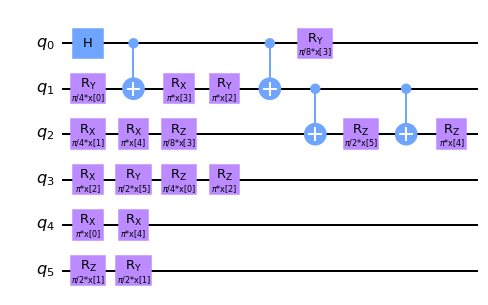

In [21]:
from qiskit.circuit import ParameterVector, QuantumCircuit
from qiskit import QuantumRegister

def coding_bits(b):
    c = [b[n:n+5] for n,i in enumerate(b) if n%5==0]
    c_p=[]
    coding_0=[]
    for i in range(len(c)):
        for j in c[i]:
            c_p.append(str(j))
    np.asarray(c_p)
    c = [c_p[n:n+5] for n,i in enumerate(c_p) if n%5==0]
    for i in c:
        coding_0.append(''.join(i))
    return coding_0

class CircuitConversor:

    def __init__(self, nqubits, nparameters):
        gates = {}
        for n, suffix in enumerate(['00','01','10','11']):
            angle = np.pi / (2**n)
            gates['000'+suffix] = (self.make_H(), 1.0)
            gates['001'+suffix] = (self.make_cx(), 2.0)
            gates['010'+suffix] = (self.make_id(), 0.0)
            gates['011'+suffix] = (self.make_rx(angle), 1.0)
            gates['100'+suffix] = (self.make_rz(angle), 1.0)
            gates['101'+suffix] = (self.make_id(), 0.0)
            gates['110'+suffix] = (self.make_id(), 0.0)
            gates['111'+suffix] = (self.make_ry(angle), 1.0)
        self.gates = gates
        self.nqubits = nqubits
        self.register = QuantumRegister(nqubits, 'q')
        self.nparameters = nparameters
        self.nqubits = nqubits
        self.x = ParameterVector('x', nparameters)

    def __call__(self, coding_0):
        print(coding_0)
        circuit = QuantumCircuit(self.register)
        k = 0
        cost = 0
        for ndx, z in enumerate(coding_0):
            qubit = ndx % self.nqubits
            target = (ndx + 1) % self.nqubits
            fn, weight = self.gates[z]
            k = fn(circuit, k, qubit, target)
            cost += weight
        for i in range(k, self.nparameters):
            circuit.rz(self.x[i]*0, self.register[0])
        return circuit, cost

    def make_id(self):
        def operation(circuit, k, qubit, target):
            return k
        return operation

    def make_H(self):
        def operation(circuit, k, qubit, target):
            circuit.h(self.register[qubit])
            return k
        return operation

    def make_cx(self):
        def operation(circuit, k, qubit, target):
            circuit.cx(self.register[qubit], self.register[target])
            return k
        return operation

    def make_rx(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.rx(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

    def make_ry(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.ry(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

    def make_rz(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.rz(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

cc = CircuitConversor(nqubits=6, nparameters=6)
fm, puertas = cc(coding_bits(iot_salidas.circ[0]))
print(puertas)
fm.draw(output='mpl')

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score
import matplotlib.pyplot as plt

In [23]:
def featuremap_performance(pop:str,nqubits:int,nparameters:int) -> None:
    '''Returns the performance of a feature map on all of the dataset'''

    df = pd.read_csv('bank_cleaned.csv')
    bank_data = df.sample(n = 20000)

    y = bank_data['y'].values
    X = bank_data[['age','job','marital','education','default','balance',
                'housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']].values


    fitness_obj = fitness.Fitness(nqubits,nparameters,X,y,debug=True)

    training_features, training_labels, test_features, test_labels = fitness.Dataset(X,y)

    model = qsvm.QSVM(lambda parameters: fitness_obj.cc(pop, parameters)[0],training_features,training_labels)#fitness_obj(pop)

    y_pred = model.predict(test_features)

    cm = confusion_matrix(test_labels, y_pred)

    #cm_display = ConfusionMatrixDisplay(cm).plot()
    ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)
    plt.show()
    recall = recall_score(test_labels, y_pred)
    acc  = accuracy_score(test_labels, y_pred)

    print(f'String = {pop},\n accuracy = {acc}, recall = {recall}')
    
    return None

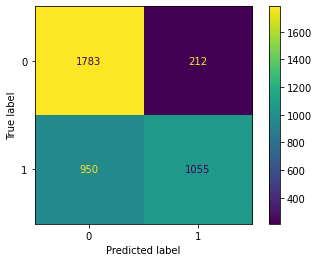

String = 000011111001110011001011110100001000110001100111010110010001110011110010011110110110011011001000011110001100100101011101110111100011001100001010110101111110010110000110011100011011,
 accuracy = 0.7095, recall = 0.5261845386533666


In [25]:
featuremap_performance(iot_salidas.circ[0],6,6)